## Setup

Import modules

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import sweetviz as sv

Define constants and import dataset

In [350]:
DATASET = '../udataset/filtered_stock_and_etfs.csv'
START_DATE = '2010-01'
END_DATE = '2022-12'

df = pd.read_csv(DATASET)

## Exploratory Data Analysis

Generate Profile report for the dataset using `ydata-profiling` library

Generate a profile report using the `sweetviz` library

Plot time series data of coca cola stock

Plot time series data of S&P500 index

## Create metric for growth

Convert the date column to date type

In [351]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df['YearMonth'] = df['Date-Time'].dt.to_period('M')

Sort the dataframe by ticker symbol and date

In [352]:
df = df.sort_values(by=['Ticker_Symbol', 'Date-Time'])

Get the monthly opening price for each stock and the opening price the previous month

In [353]:
month_open_prices = df.groupby(['Ticker_Symbol', 'YearMonth'])['Open'].first().reset_index()

month_open_prices['Prev_First_Open'] = month_open_prices.groupby('Ticker_Symbol')['Open'].shift(1)

Calculate the monthly growth for each stock

In [354]:
month_open_prices['Monthly_Growth (%)'] = ((month_open_prices['Open'] - month_open_prices['Prev_First_Open']) / month_open_prices['Prev_First_Open']) * 100

Calculate the cumulative monthly growth for each stock

In [355]:
month_open_prices['Cumulative_Growth (%)'] = month_open_prices.groupby('Ticker_Symbol')['Monthly_Growth (%)'].cumsum()

Drop the first row of each stock

In [356]:
growth = month_open_prices.dropna(subset=['Prev_First_Open'])
#growth['YearMonth']-=1

growth.to_csv('../udataset/stock_growth_month.csv', index=False)

## Plot growth for each symbol

/tmp/ipykernel_1250/214737088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packa

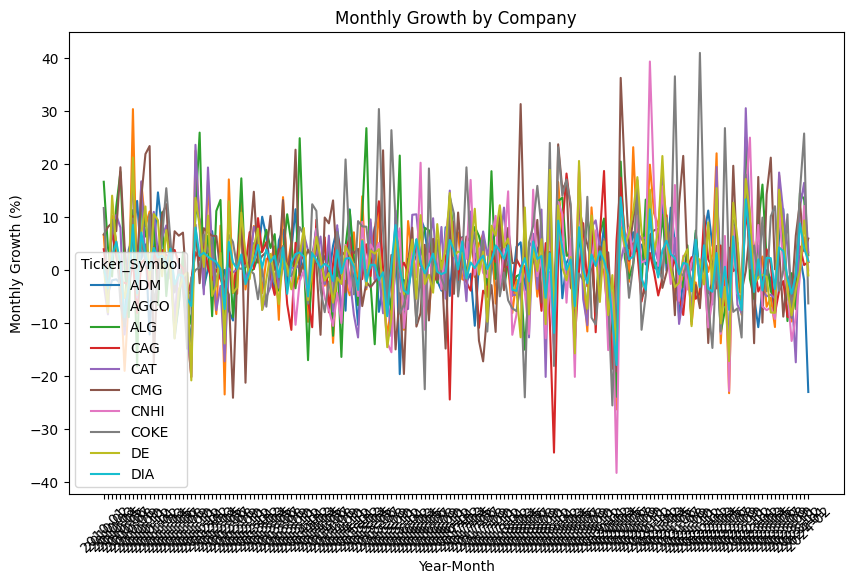

In [357]:
display_data = growth[growth['YearMonth'] >= pd.Period(START_DATE)]

display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)

company_subset = display_data['Ticker_Symbol'].unique()[:10] # First 10 companies
plot_data = display_data[display_data['Ticker_Symbol'].isin(company_subset)]


plt.figure(figsize=(10, 6)) # TODO - Note that graph is not well labeled
sns.lineplot(data=plot_data, x='YearMonth_str', y='Monthly_Growth (%)', hue='Ticker_Symbol')
plt.xticks(rotation=45)
plt.title('Monthly Growth by Company')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Growth (%)')
plt.show()

In [358]:
MARKETCAP = '../udataset/market_cap.csv'
cap_df = pd.read_csv(MARKETCAP)
#cap_df = cap_df[cap_df['Ticker'] == 'COKE']
fast_food_tickers = ['WEN', 'YUM', 'MCD', 'CMG', 'DPZ']
#fast_food_tickers = ['YUM']
cap_df = cap_df[cap_df['Ticker'].isin(fast_food_tickers)]
cap_df['YearMonth'] = pd.to_datetime(cap_df['YearMonth'])
cap_df['YearMonth'] = cap_df['YearMonth'].dt.to_period('M')


In [359]:
POVERTYDATA = '../udataset/wealth_data.csv'
state_df = pd.read_csv(POVERTYDATA)
state_df.dtypes

Unnamed: 0                                        int64
state                                            object
year                                              int64
labour_force_pop                                float64
below_poverty_line_percent                      float64
median_household_income                         float64
mean cash public assistance income (dollars)    float64
dtype: object

In [360]:
# growth = pd.merge()
print(cap_df.columns)
cap_df = cap_df.rename(columns = {'Ticker': 'Ticker_Symbol'})
growth = pd.merge(growth, cap_df, on = ['YearMonth', 'Ticker_Symbol'], how='left')

Index(['YearMonth', 'Ticker', 'MarketCap'], dtype='object')


In [361]:
growth = growth[growth['YearMonth'] >= pd.Period(START_DATE)]
growth
#growth['market_cap'] = growth.apply(get_market_cap, axis=1)


Ticker_Symbol YearMonth    Open  Prev_First_Open  Monthly_Growth (%)  \
121            ADM   2010-01   31.48           31.250            0.736000   
122            ADM   2010-02   30.07           31.480           -4.479034   
123            ADM   2010-03   29.49           30.070           -1.928833   
124            ADM   2010-04   28.97           29.490           -1.763310   
125            ADM   2010-05   28.23           28.970           -2.554367   
...            ...       ...     ...              ...                 ...   
7780           YUM   2023-10  124.53          129.925           -4.152396   
7781           YUM   2023-11  121.88          124.530           -2.128001   
7782           YUM   2023-12  125.59          121.880            3.043978   
7783           YUM   2024-01  129.73          125.590            3.296441   
7784           YUM   2024-02  129.31          129.730           -0.323749   

      Cumulative_Growth (%)     MarketCap  
121              146.566170           NaN  
122              142.087136           NaN  
123              140.158303           NaN  
124              138.394994           NaN  
125              135.840627           NaN  
...                     ...           ...  
7780             243.938298  3.347400e+10  
7781             241.810297  3.540190e+10  
7782             244.854274  3.569160e+10  
7783             248.150715  3.597470e+10  
7784             247.826966  3.608970e+10  

[4816 rows x 7 columns]

In [362]:
growth['MarketCap_growth'] = growth['MarketCap']*growth['Monthly_Growth (%)']

In [363]:
growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period(START_DATE)) & (growth['YearMonth'] <= pd.Period(END_DATE))]['Monthly_Growth (%)']


5999    1.307248
6000   -3.755451
6001    2.820157
6002    5.935252
6003    1.341256
          ...   
6150    8.654663
6151   -3.974093
6152   -8.096414
6153    8.048078
6154    4.775209
Name: Monthly_Growth (%), Length: 156, dtype: float64

In [364]:
overall_growth = []
year_month = []
start_year = int(START_DATE[:4])
end_year = int(END_DATE[:4])+1
for year in range(start_year, end_year):

    last_month = 13

    if year == end_year -1:
        last_month = int(END_DATE[-2:])+1



    for month in range(1, last_month):
        month_string = str(month)
        if len(month_string) == 1:
            month_string = '0' + month_string

        date_string = f'{str(year)}-{month_string}'
        year_month.append(date_string)

        overall_growth.append(growth[growth['YearMonth'] == pd.Period(date_string)]['MarketCap_growth'].sum()/growth[growth['YearMonth'] == pd.Period(date_string)]['MarketCap'].sum())

new_df = pd.DataFrame({'year-month': year_month, 'S&P_growth': growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period(START_DATE)) & (growth['YearMonth'] <= pd.Period(END_DATE))]['Monthly_Growth (%)']})
new_df['processed_food_growth'] = overall_growth
new_df['growth_diff'] = (new_df['S&P_growth'] - new_df['processed_food_growth'])/(((new_df['processed_food_growth'])+new_df['S&P_growth'])/2)
new_df

year-month  S&P_growth  processed_food_growth  growth_diff
5999    2010-01    1.307248              -0.782716     7.968861
6000    2010-02   -3.755451               0.385017     2.456934
6001    2010-03    2.820157               1.548223     0.582337
6002    2010-04    5.935252               6.692672    -0.119960
6003    2010-05    1.341256               7.367336    -1.383939
...         ...         ...                    ...          ...
6150    2022-08    8.654663               8.399102     0.029971
6151    2022-09   -3.974093              -3.937475     0.009257
6152    2022-10   -8.096414              -6.522852     0.215272
6153    2022-11    8.048078              13.494357    -0.505633
6154    2022-12    4.775209               2.914334     0.484001

[156 rows x 4 columns]

In [365]:
UNEMPLOYMENTDATA = '../udataset/unemployment_by_state.csv'
unemployment_df = pd.read_csv(UNEMPLOYMENTDATA)
unemployment_df.columns = unemployment_df.columns.str.strip()
unemployment_df = unemployment_df.rename(columns={'YearMonth': 'year-month', 'unemploymentrate': 'unemployment-rate'})
unemployment_df.columns = unemployment_df.columns.str.lower()
unemployment_df = unemployment_df.rename(columns={'YearMonth': 'year-month', 'unemploymentrate': 'unemployment-rate'})
unemployment_df

state year-month  unemployment-rate
0         alabama    2010-01               11.7
1         alabama    2010-02               11.4
2         alabama    2010-03               11.0
3         alabama    2010-04               10.1
4         alabama    2010-05                9.9
...           ...        ...                ...
8835  puerto rico    2023-10                5.5
8836  puerto rico    2023-11                5.7
8837  puerto rico    2023-12                5.8
8838  puerto rico    2024-01                5.8
8839  puerto rico    2024-02                5.8

[8840 rows x 3 columns]

In [366]:
POVERTYDATA ='../udataset/wealth_data_interpolated.csv'
poverty_df = pd.read_csv(POVERTYDATA)
poverty_df['date'] = poverty_df['date'].str.slice(0, 7)
poverty_df = poverty_df.rename(columns = {'date': 'year-month'})
poverty_df

year-month  below_poverty_line_percent    state
0       2010-01                   24.273973  alabama
1       2010-02                   24.343014  alabama
2       2010-03                   24.419452  alabama
3       2010-04                   24.493425  alabama
4       2010-05                   24.569863  alabama
...         ...                         ...      ...
7483    2021-08                   12.734131  wyoming
7484    2021-09                   12.709994  wyoming
7485    2021-10                   12.679597  wyoming
7486    2021-11                   12.644392  wyoming
7487    2021-12                   12.601500  wyoming

[7488 rows x 3 columns]

In [367]:
unemployment_df = pd.merge(unemployment_df, poverty_df, on=['year-month', 'state'])

In [368]:
#unemployment_rate = [9.63, 8.95, 8.07, 7.37, 6.17, 5.28, 4.87, 4.36, 3.90, 3.67, 8.05, 5.35, 3.61]
for state in unemployment_df['state'].unique():
    temp_df = unemployment_df[unemployment_df['state'] == state].copy()
    temp_df['unemployment-rate'] = temp_df['below_poverty_line_percent']/temp_df['unemployment-rate']
    temp_df = temp_df.rename(columns={'unemployment-rate': f'{state}-unemployment-rate', 'below_poverty_line_percent': f"{state}-poverty-percent"})
    temp_df = temp_df.drop(columns=['state'])

    print(temp_df.columns)
    new_df = pd.merge(new_df, temp_df, on=['year-month'])


new_df
#print(new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']))

Index(['year-month', 'alabama-unemployment-rate', 'alabama-poverty-percent'], dtype='object')
Index(['year-month', 'alaska-unemployment-rate', 'alaska-poverty-percent'], dtype='object')
Index(['year-month', 'arizona-unemployment-rate', 'arizona-poverty-percent'], dtype='object')
Index(['year-month', 'arkansas-unemployment-rate', 'arkansas-poverty-percent'], dtype='object')
Index(['year-month', 'california-unemployment-rate',
       'california-poverty-percent'],
      dtype='object')
Index(['year-month', 'colorado-unemployment-rate', 'colorado-poverty-percent'], dtype='object')
Index(['year-month', 'connecticut-unemployment-rate',
       'connecticut-poverty-percent'],
      dtype='object')
Index(['year-month', 'delaware-unemployment-rate', 'delaware-poverty-percent'], dtype='object')
Index(['year-month', 'district of columbia-unemployment-rate',
       'district of columbia-poverty-percent'],
      dtype='object')
Index(['year-month', 'florida-unemployment-rate', 'florida-poverty-perc

year-month  S&P_growth  processed_food_growth  growth_diff  \
0      2010-01    1.307248              -0.782716     7.968861   
1      2010-02   -3.755451               0.385017     2.456934   
2      2010-03    2.820157               1.548223     0.582337   
3      2010-04    5.935252               6.692672    -0.119960   
4      2010-05    1.341256               7.367336    -1.383939   
..         ...         ...                    ...          ...   
139    2021-08    2.674470              10.016588    -1.157054   
140    2021-09    2.775128              -1.499957     6.705115   
141    2021-10   -4.768428              -0.586910     1.561626   
142    2021-11    6.803100               0.627407     1.662254   
143    2021-12    0.291114              -0.940284    -3.793765   

     alabama-unemployment-rate  alabama-poverty-percent  \
0                     2.074699                24.273973   
1                     2.135352                24.343014   
2                     2.219950                24.419452   
3                     2.425092                24.493425   
4                     2.481804                24.569863   
..                         ...                      ...   
139                   6.295690                22.034917   
140                   7.586904                22.002021   
141                   8.136305                21.968022   
142                   9.139630                21.935112   
143                   9.522216                21.901097   

     alaska-unemployment-rate  alaska-poverty-percent  \
0                    1.394460               12.968474   
1                    1.348072               12.941488   
2                    1.359406               12.914357   
3                    1.516570               12.890848   
4                    1.608674               12.869394   
..                        ...                     ...   
139                  2.502548               13.013247   
140                  2.501482               13.007707   
141                  2.500671               13.003487   
142                  2.407582               13.000945   
143                  2.452830               13.000001   

     arizona-unemployment-rate  arizona-poverty-percent  ...  \
0                     1.990766                21.699350  ...   
1                     2.055978                21.793362  ...   
2                     2.126104                21.898869  ...   
3                     2.178453                22.002374  ...   
4                     2.211075                22.110750  ...   
..                         ...                      ...  ...   
139                   3.708522                18.171756  ...   
140                   4.114135                18.102193  ...   
141                   4.745391                18.032485  ...   
142                   5.284471                17.967200  ...   
143                   5.594394                17.902061  ...   

     washington-unemployment-rate  washington-poverty-percent  \
0                        1.571927                   16.033656   
1                        1.590737                   16.066441   
2                        1.643289                   16.104229   
3                        1.813734                   16.142234   
4                        1.818307                   16.182930   
..                            ...                         ...   
139                      2.373901                   12.106895   
140                      2.621527                   12.059022   
141                      2.928693                   12.007643   
142                      3.065716                   11.956293   
143                      3.132047                   11.901780   

     west virginia-unemployment-rate  west virginia-poverty-percent  \
0                           2.426256                      23.777314   
1                           2.284568                      23.759503   
2                           2.473254                  

In [369]:
print(new_df[new_df.columns[1:]].corr())
new_df[new_df.columns[1:]].corr().to_csv('state_correlation.csv')
#new_df['expanding_correlation'] = new_df['unemployment_rate'].expanding().corr(new_df['growth_diff'])

                               S&P_growth  processed_food_growth  growth_diff  \
S&P_growth                       1.000000               0.644234    -0.045312   
processed_food_growth            0.644234               1.000000     0.071166   
growth_diff                     -0.045312               0.071166     1.000000   
alabama-unemployment-rate        0.037411               0.015951    -0.037644   
alabama-poverty-percent         -0.054084              -0.070672     0.042741   
...                                   ...                    ...          ...   
wisconsin-poverty-percent       -0.055565              -0.072297     0.055321   
wyoming-unemployment-rate       -0.089066              -0.094673    -0.055594   
wyoming-poverty-percent         -0.005784              -0.072208     0.056817   
puerto rico-unemployment-rate   -0.007903               0.012993    -0.074467   
puerto rico-poverty-percent     -0.066046              -0.059564    -0.054618   

                           

In [370]:
new_df.to_csv('../udataset/growth_vs_unemployment_month.csv')